# Explore here

In [276]:
import pandas as pd
import requests
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from sklearn.feature_selection import mutual_info_regression, SelectKBest

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [277]:
# Importamos datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


En el data set podemos observar un registro de 768 pacientes, 9 caracteristicas relevantes para la prediccion. Los datos estan en int64 y float64. 

Por otro lado, podemos ver que hay variables importantes, como *pregnancies*, *glucose*, *bloodpressure*, *bmi*.

-  Variable objetivo: *Outcome* donde 0: no tiene diabetes, 1: si tiene diabetes.

In [279]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Podemos ver que en el Dataset no hay valores nulos.

In [280]:
# Reemplazar datos 0 en las columns por la mean porque
#  luego no nos ayuda para nuestro analisis

columns = ["Glucose", "Pregnancies", "Insulin", "BloodPressure", "Age", "BMI", "DiabetesPedigreeFunction", "SkinThickness"]
for col in columns:
    df[col] = df[col].replace(0, df[col].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


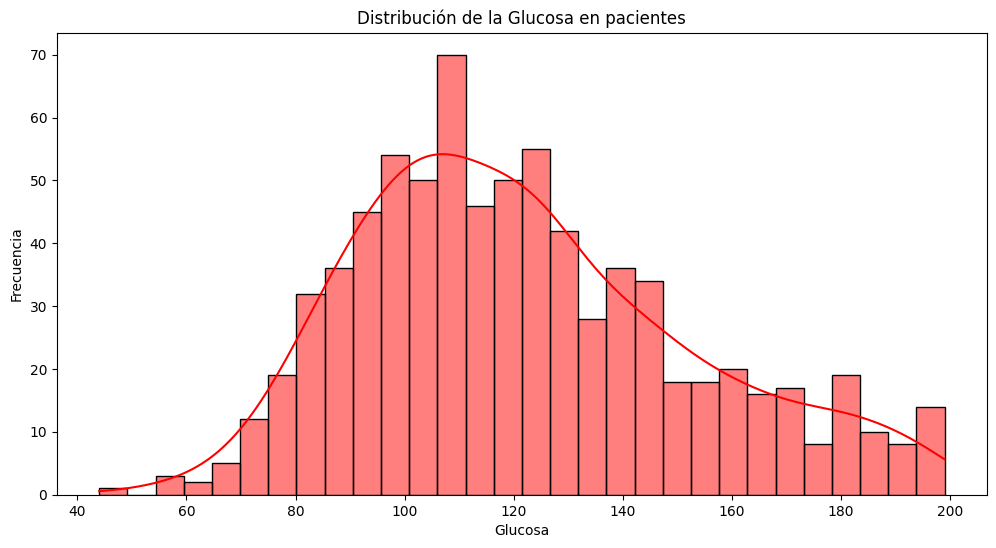

In [281]:
#Distribucion con la variable objetivo
plt.figure(figsize=(12, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='red')
plt.title('Distribución de la Glucosa en pacientes')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.show()

La mayoria de los valores se concentran en un rango de 80-140, indicando que algunos pacientes tienen niveles altos de glucosa es una señal de prevalencia de diabetes. 

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


El dataset tiene 768 registros y 9 columnas, todas las variables sin valores nulos. Todas las caracteristicas son numericas, entre ellas 7 variables float, 1 variable int64, y nuestra variable objetivo *Outcome* que es binaria, la distribucion esta desbalancead ya que hay 500 casos no diabeticos y 268 diabeticos. 

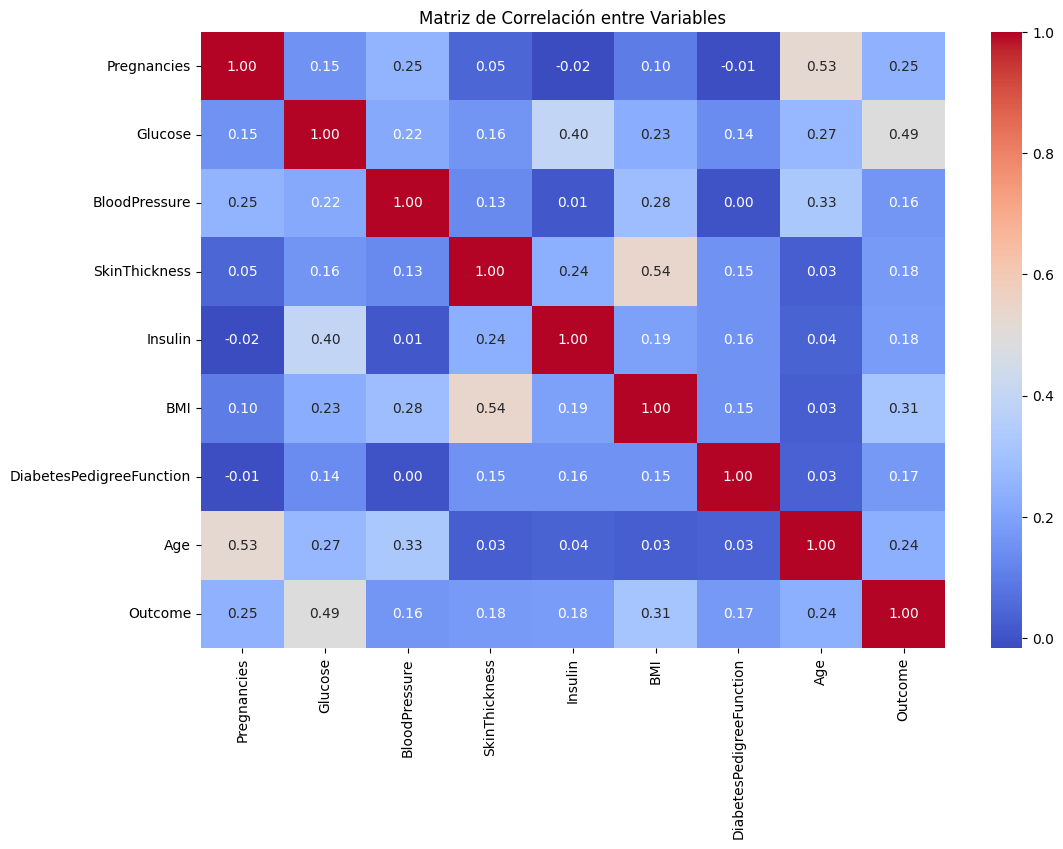

In [283]:
#Matriz de correlacion con todas las variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

En nuestra matriz de correlacion podemos observar que *Glucose* tiene una correlación fuerte con *Outcome*, lo que indica que los niveles de glucosa son un buen predictor de diabetes.

*Age* y *Pregnancies* también tienen una correlación relativamente alta, lo cual es lógico ya que la cantidad de embarazos tiende a aumentar con la edad.

*BMI* muestra una correlación moderada con *SkinThickness*, es decir, que el grosor de la piel puede estar relacionado con el índice de masa corporal.

y por otro lado, que *Glucose*, *BMI* y *Age* tienen correlaciones más altas con Outcome, podrían ser variables clave para entrenar el modelo de predicción. Sin embargo, *insulin* y *BloodPressure* muentran correlacion bajas. 

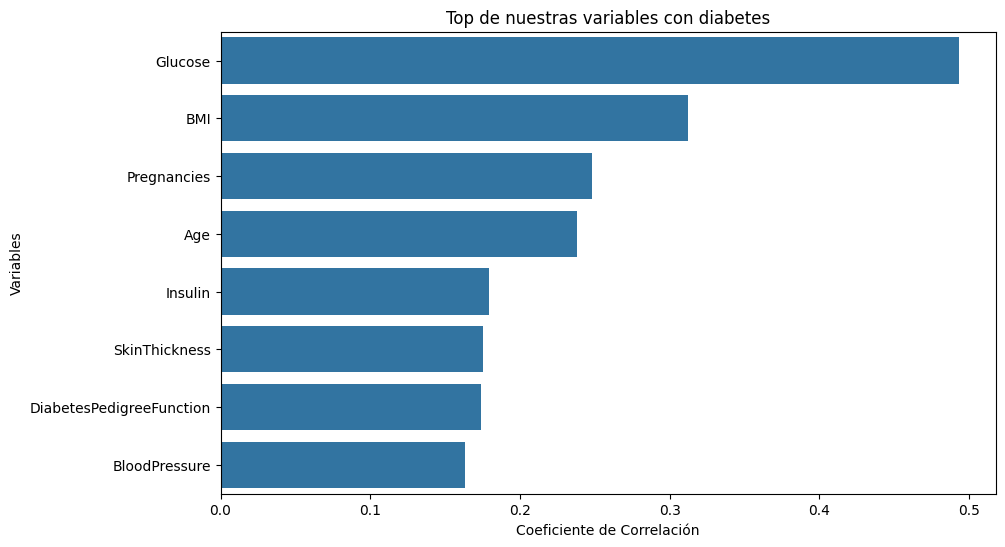

In [284]:
#Correlacion de nuestra variable objetivo con las demas. 

corr = df.corr(numeric_only=True)
corr_diabetes = corr["Outcome"].drop("Outcome").sort_values(ascending=False).head(8)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_diabetes.values, y=corr_diabetes.index, legend=False)
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.title("Top de nuestras variables con diabetes")
plt.show()

En este grafico podemos deducir que el diabetes es mayormente influenciado por la glucosa y por el indice de grasa, en pocas palabras, aquellas personas que consumen muchos azucares y grasa son mas propensos a contraer el diabetes. 

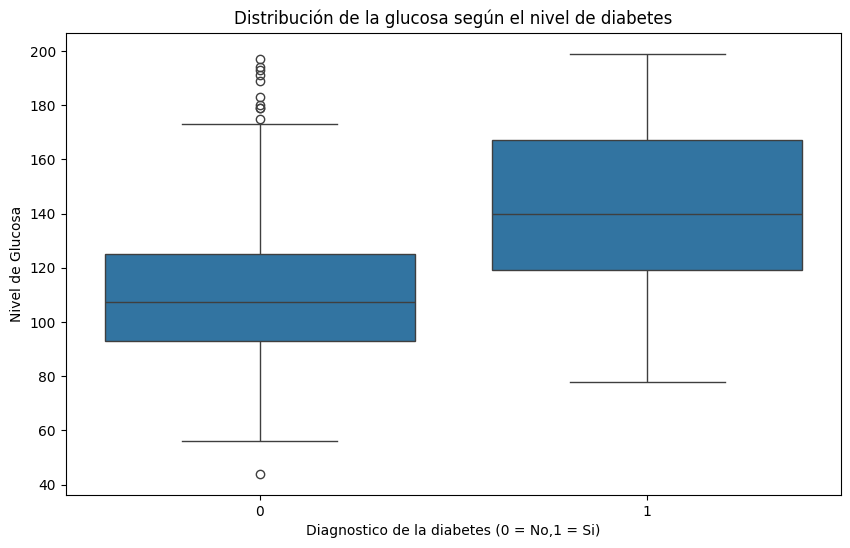

In [285]:
# Impacto de la glucosa con la diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Distribución de la glucosa según el nivel de diabetes")
plt.xlabel("Diagnostico de la diabetes (0 = No,1 = Si)")
plt.ylabel("Nivel de Glucosa")
plt.show()

El grafico nos muestra que hay mas pacientes con diabetes, y que hay algunos datos dentro de nuestro dataset dentro de acerca de los no, que pueden afectar a nuestro analisis y deducciones. 

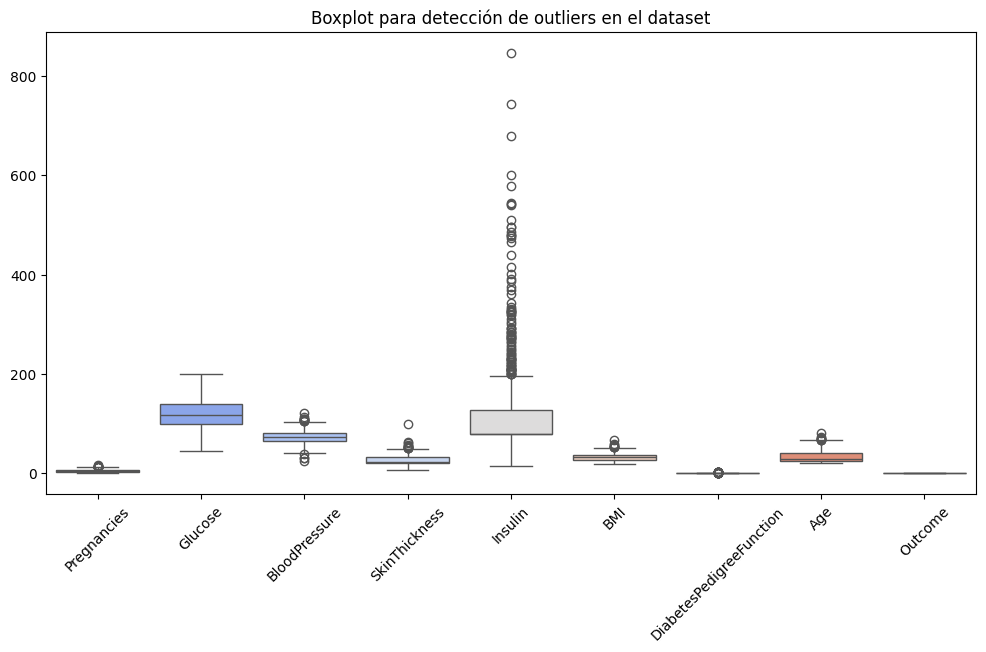

In [286]:
# Outliers dentro del dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.title("Boxplot para detección de outliers en el dataset")
plt.xticks(rotation=45)
plt.show()


In [287]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

# Filtrar valores extremos
df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Cantidad de posibles outliers: {df_outliers.shape[0]}")


Cantidad de posibles outliers: 157


In [288]:

# Calcular IQR insulina
Q1 = df["Insulin"].quantile(0.25)
Q3 = df["Insulin"].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower:.2f}, Límite superior: {upper:.2f}")

Límite inferior: 8.62, Límite superior: 198.43


In [289]:
outliers_insulin = df[(df["Insulin"] < 8.62) | (df["Insulin"] > 198.43)]
print(f"Cantidad de valores atípicos en Insulin: {outliers_insulin.shape[0]}")

Cantidad de valores atípicos en Insulin: 89


In [290]:
# IQR EN Bloodpressure

Q1 = df["BloodPressure"].quantile(0.25)
Q3 = df["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bound:.2f}, Límite superior: {upper_bound:.2f}")


Límite inferior: 40.00, Límite superior: 104.00


In [291]:
# Identificar los valores fuera del rango IQR en BloodPressure
outliers_bp = df[(df["BloodPressure"] < 40.00) | (df["BloodPressure"] > 104.00)]
print(f"Cantidad de valores atípicos en BloodPressure: {outliers_bp.shape[0]}")


Cantidad de valores atípicos en BloodPressure: 14


In [292]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
lower_bM = Q1 - 1.5 * IQR
upper_bM = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bM:.2f}, Límite superior: {upper_bM:.2f}")

Límite inferior: 13.85, Límite superior: 50.25


In [293]:
# Identificar los valores fuera del rango IQR en BloodPressure
outliers_bM = df[(df["BMI"] < 13.85) | (df["BMI"] > 50.25)]
print(f"Cantidad de valores atípicos en BMI: {outliers_bM.shape[0]}")


Cantidad de valores atípicos en BMI: 8


In [294]:
# Eliminar valores en BloodPressure, Insulin Y BMI
# Calcular percentiles
low_st = df['BMI'].quantile(0.01)
high_st = df['BMI'].quantile(0.99)
df_cleaned = df[(df['BMI'] >= low_st) & (df['BMI'] <= high_st)]

low_bp = df['BloodPressure'].quantile(0.01)
high_bp = df['BloodPressure'].quantile(0.99)
df_cleaned = df[(df['BloodPressure'] >= low_bp) & (df['BloodPressure'] <= high_bp)]

#En el caso de insulin, tambien quito los valores en 0, 
# porque logico son erroneos

p5 = df_cleaned['Insulin'].quantile(0.05)
p95 = df_cleaned['Insulin'].quantile(0.95)
df_cleaned = df_cleaned[(df_cleaned['Insulin'] > 0) & (df_cleaned['Insulin'] >= p5) & (df_cleaned['Insulin'] <= p95)]


In [295]:
print(f"Registros originales: {df.shape[0]} vs Registros después de limpiar outliers: {df_cleaned.shape[0]}")

outliers_clean= df.shape[0] - df_cleaned.shape[0]
print(f"Cantidad de registros eliminados: {outliers_clean}")


Registros originales: 768 vs Registros después de limpiar outliers: 682
Cantidad de registros eliminados: 86


In [296]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               682 non-null    float64
 1   Glucose                   682 non-null    float64
 2   BloodPressure             682 non-null    float64
 3   SkinThickness             682 non-null    float64
 4   Insulin                   682 non-null    float64
 5   BMI                       682 non-null    float64
 6   DiabetesPedigreeFunction  682 non-null    float64
 7   Age                       682 non-null    int64  
 8   Outcome                   682 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 53.3 KB


Luego de la eliminacion de los outliers nuestro dataset ahora se ve asi:
-  682 registros y 9 columnas, donde 7 de ellas son float64 y 2 int64. 
- No hay valores nulos. 
Por ende nos ayudara ahora a obtener un mejor analisis. 

In [297]:

# Definir características (X) y variable objetivo (y)

X = df_cleaned.drop(columns=["Outcome"], axis=1)
y = df_cleaned["Outcome"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Le hago un balanceo porque siento que los datos del nuestra variable objetivo van a afectar nuestro analisis dado que hay mas casos que no hay diabetes.

In [298]:
df_cleaned["Outcome"].value_counts()

Outcome
0    446
1    236
Name: count, dtype: int64

In [299]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verificar nueva distribución
print(y_train_balanced.value_counts())


Outcome
0    356
1    356
Name: count, dtype: int64


In [300]:
#Modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

#Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled)


print("Precisión del modelo en test:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))




Precisión del modelo en test: 0.6642335766423357

Matriz de confusión:
[[70 20]
 [26 21]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        90
           1       0.51      0.45      0.48        47

    accuracy                           0.66       137
   macro avg       0.62      0.61      0.61       137
weighted avg       0.65      0.66      0.66       137



La precisión del modelo es 66%, lo que indica que clasifica correctamente la mayoría de los casos.
70 casos negativos → Pacientes no diabeticos.
20 falsos positivos → El modelo predijo diabetes cuando el paciente no la tenía.
26 falsos negativos → Pacientes con diabetes que el modelo clasificó erróneamente como sanos.
21 verdaderos positivos → Casos de diabetes.

Hay bastantes falsos negativos (26), lo que significa que muchas personas que sí eran positivas el modelo no las detecta.

Pacientes sin diabetes:
*Recall*: Predice la mayoria de casos sin diabetes. 
*Precision*: El modelo es bueno prediciendo pacientes sanos.

Pacientes con diabetes:

*Precisión*: En la predicion solo el 51% realmente lo son.
*Recall* el modelo identifica correctamente el 45%, dejando algunos sin detectar.

Aunque el modelo tiene un desempeño aceptable, aún hay falsos negativos (Outcome = 1 mal clasificados), lo cual es crítico en problemas médicos. Mejorar el recall de la clase 1 podría ayudar a identificar más casos de diabetes.

In [301]:
nuevo_paciente = [[2, 120, 70, 85, 20, 28.5, 0.5, 30]]

columns_df = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness',
              'BMI', 'DiabetesPedigreeFunction', 'Age']
nuevo_paciente_df = pd.DataFrame(nuevo_paciente, columns=df_cleaned.columns[:-1])

nuevo_paciente_scaled = scaler.transform(nuevo_paciente_df)

# Predecir diagnóstico
prediccion = model.predict(nuevo_paciente_scaled)

# Resultado
resultado = "Tiene diabetes" if prediccion[0] == 1 else "No tiene diabetes"
print(f"Resultado del paciente: {resultado}")


Resultado del paciente: Tiene diabetes


In [302]:
# Árbol GINI
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train_scaled, y_train)

# Árbol ENTROPY
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train_scaled, y_train)

# Predicciones
y_pred_gini = tree_gini.predict(X_test_scaled)
y_pred_entropy = tree_entropy.predict(X_test_scaled)

# Evaluación de precisión
acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Precisión con GINI: {acc_gini:.3f}")
print(f"Precisión con ENTROPY: {acc_entropy:.3f}")


Precisión con GINI: 0.679
Precisión con ENTROPY: 0.708


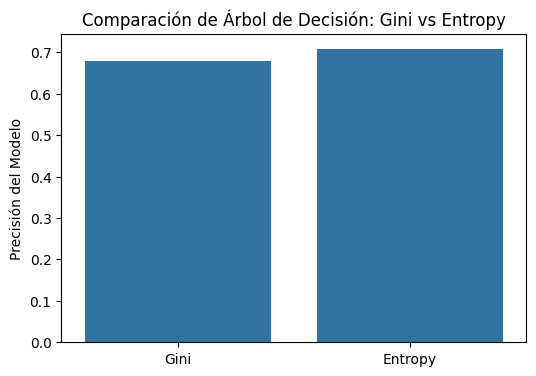

In [303]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["Gini", "Entropy"], y=[acc_gini, acc_entropy])
plt.ylabel("Precisión del Modelo")
plt.title("Comparación de Árbol de Decisión: Gini vs Entropy")
plt.show()


In [304]:
tree = DecisionTreeClassifier(random_state=42)

# hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearch
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Entrenar
grid_search.fit(X_train_scaled, y_train)

# Mejor combinación de parámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test_scaled)

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión final en Test:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

Matriz de confusión:
[[73 17]
 [16 31]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        90
           1       0.65      0.66      0.65        47

    accuracy                           0.76       137
   macro avg       0.73      0.74      0.73       137
weighted avg       0.76      0.76      0.76       137


Precisión final en Test: 0.7591240875912408


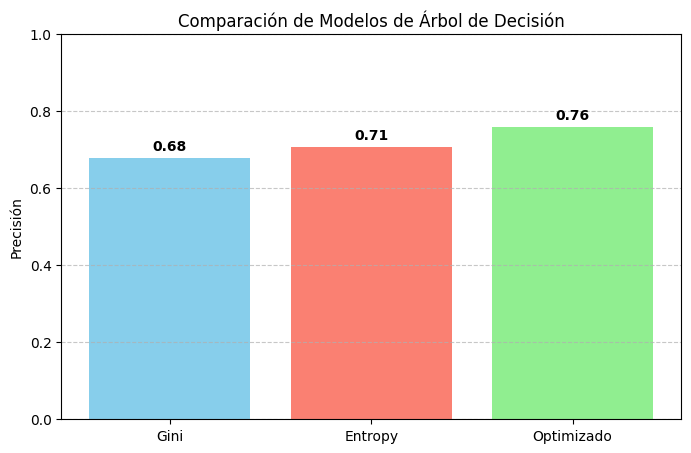

In [305]:
# Precisión de cada modelo
acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
acc_best = accuracy_score(y_test, y_pred)

# Datos para el gráfico
model_names = ['Gini', 'Entropy', 'Optimizado']
accuracies = [acc_gini, acc_entropy, acc_best]

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Precisión')
plt.title('Comparación de Modelos de Árbol de Decisión')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Gini: Precisión de 68%, es el más bajo de los tres modelos. Esto indica que aunque el criterio Gini es rápido y eficiente, no separó tan bien las clases en este problema.

Entropy: Precisión de 71%, mejoró ligeramente respecto a Gini, Entropy tiende a buscar información más clara.

Optimizado con GridSearchCV: Precisión de 76%, mayor precisión de todos los modelos. Gracias al ajuste de hiperparámetros, el modelo logró generalizar mejor y capturar más patrones útiles.